## Data Loading

Sumber dataset: 
- [Kaggle (2020) - 20k](https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews)
- [Carnegie Mellon University - 800k](https://www.cs.cmu.edu/~jiweil/html/hotel-review.html)

Melakukan import library yang dibutuhkan dan memuat dataset yang akan digunakan.

In [4]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import LancasterStemmer
import seaborn as sns
import nltk
import string
import re
import seaborn as sns
from sklearn.utils import resample
from nltk.corpus import stopwords
from langdetect import detect
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
from textblob import TextBlob
from IPython.display import clear_output

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df_data = pd.read_csv('Data/data_2/review.csv')
df_data = df_data[['ratings_overall', 'title', 'text']]
df_data

,ratings_overall,title,text
0,5.0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...
1,5.0,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the..."
2,4.0,“Great Stay”,This is a great property in Midtown. We two di...
3,4.0,“Modern Convenience”,The Andaz is a nice hotel in a central locatio...
4,4.0,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...
...,...,...,...
878556,4.0,“vil komme igen”,"Pænt hotel i et livligt miljø. Store værelser,..."
878557,4.0,“excellent”,"un excellent hotel 4 *, pour un prix raisonnab..."
878558,5.0,“Un hotel eccezionale”,"L'hotel, situato in una zona tranquilla e a du..."
878559,5.0,“Gerne wieder”,Sehr schön ausgestattetes Hotel in bester Lage...


## Exploratory Data Analysis

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878561 entries, 0 to 878560
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ratings_overall  878561 non-null  float64
 1   title            878561 non-null  object 
 2   text             878561 non-null  object 
dtypes: float64(1), object(2)
memory usage: 20.1+ MB


In [7]:
print('duplicated\t', df_data.duplicated().sum())
print(df_data.isnull().sum())

duplicated	 803
ratings_overall    0
title              0
text               0
dtype: int64


In [8]:
df_data.describe()

,ratings_overall
count,878561.000000
mean,3.936228
std,1.165074
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [9]:
def language_detection_single(text):
    try:
        return detect(text)
    except:
        return 'other'
    
def language_detection(texts, n_jobs=1):
    with ThreadPoolExecutor(max_workers=n_jobs) as executor:
        languages = list(executor.map(language_detection_single, texts))
    return languages

In [10]:
df_data['language'] = language_detection(df_data['text'], n_jobs=6)
df_data.value_counts('language')

language
en       770972
de        27051
fr        24990
it        20327
es        14170
ja         6014
pt         4534
nl         3264
sv         2973
da         1671
no         1394
zh-cn       528
ru          281
tr          110
af          104
pl           51
ko           38
el           20
th           15
ca           15
zh-tw         9
so            8
id            5
ro            4
vi            4
sl            2
other         2
fi            1
sq            1
ar            1
hu            1
lv            1
Name: count, dtype: int64

In [11]:
df_data = df_data[df_data['language'] == 'en']

In [12]:
analyzer = SentimentIntensityAnalyzer()

In [13]:
def sentiment_analyzer_scores_single(sentence):
    score = analyzer.polarity_scores(sentence)
    if score['compound'] >= 0.5:
        return 'positive'
    elif score['compound'] <= -0.5:
        return 'negative'
    else:
        return 'neutral'

def sentiment_analyzer_scores(sentences, n_jobs=1):
    with ThreadPoolExecutor(max_workers=n_jobs) as executor:
        sentiments = list(executor.map(sentiment_analyzer_scores_single, sentences))
    return sentiments

In [14]:
# df_data['label'] = sentiment_analyzer_scores(df_data['text'], n_jobs=6)

In [16]:
df_data['label'] = df_data['ratings_overall'].apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))

C:\Users\ACER\AppData\Local\Temp\ipykernel_10216\3399446719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['label'] = df_data['ratings_overall'].apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))


<Axes: xlabel='label'>

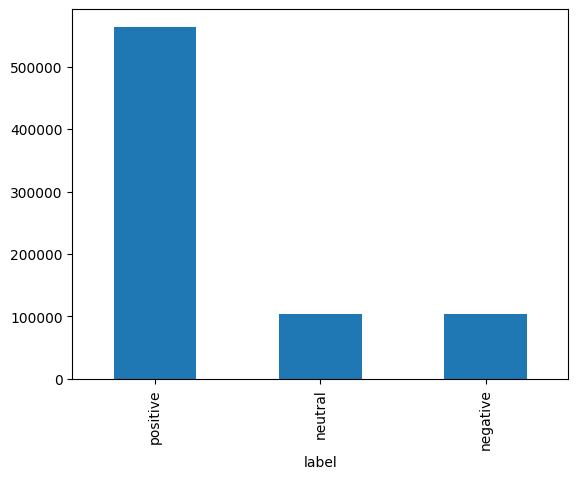

In [17]:
df_data['label'].value_counts().plot(kind='bar')

In [18]:
df_data['label'].value_counts()

label
positive    563997
neutral     103740
negative    103235
Name: count, dtype: int64

## Data Preprocessing

### Remove Duplicate Data

In [19]:
df_data.drop_duplicates(inplace=True)
df_data.duplicated().sum()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10216\4057778840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.drop_duplicates(inplace=True)


0

### Downsample Data

In [20]:
df_new = pd.DataFrame()
target_count = 103233

for rating, group in df_data.groupby('label'):
    if len(group) > target_count:
        ratings_new = resample(group, replace=False, n_samples=target_count, random_state=42)
    else:
        ratings_new = group
    df_new = pd.concat([df_new, ratings_new])

df_data = df_new.reset_index(drop=True)
df_data['label'].value_counts()

label
neutral     103233
positive    103233
negative    103225
Name: count, dtype: int64

In [21]:
df_data['text'] = df_data['title'] + ' ' + df_data['text']
df_data = df_data[['text', 'label']]

### Remove Special Character and Additional Cleaning

In [22]:
def remove_punctuation(text):
    text = ''.join([char if char not in string.punctuation else ' ' for char in text]).lower()
    return text

In [23]:
def additional_cleaning(text):
    replacements = {
        'n t': 'not',
        'nt': 'not',
        'didn t': 'did not',
        'didn': 'did not',
        'don t': 'do not',
        'don': 'do not',
        'doesn t': 'does not',
        'doesn': 'does not',
        'hasn t': 'has not',
        'hasn': 'has not',
        'haven t': 'have not',
        'haven': 'have not',
        'hadn t': 'had not',
        'hadn': 'had not',
        'won t': 'will not',
        'won': 'will not',
        'wouldn t': 'would not',
        'wouldn': 'would not',
        'can t': 'can not',
        'can': 'can not',
        'couldn t': 'could not',
        'couldn': 'could not',
        'shouldn t': 'should not',
        'shouldn': 'should not',
        'aren t': 'are not',
        'aren': 'are not',
        'ain t': 'am not',
        'ain': 'am not',
        'isn t': 'is not',
        'isn': 'is not',
        'wasn t': 'was not',
        'wasn': 'was not',
        'were t': 'were not',
        'were': 'were not',
        'weren t': 'were not',
        'weren': 'were not',
        'what s': 'what is',
        'what': 'what is',
        'who s': 'who is',
        'who': 'who is',
        'where s': 'where is',
        'where': 'where is',
        'when s': 'when is',
        'when': 'when is',
        'why s': 'why is',
        'why': 'why is',
        'how s': 'how is',
        'how': 'how is',
        'll': 'will',
        've': 'have',
        're': 'are',
        'm': 'am',
        'em': 'them',
        'thats': 'that is',
        'that s': 'that is'
    }
    for old, new in replacements.items():
        text = re.sub(r'\b' + old + r'\b', new, text)

    text = re.sub(r'[^\x00-\x7F]+', '', text)

    return text

In [24]:
df_data['text'] = df_data['text'].apply(lambda x: remove_punctuation(x)).apply(lambda x: additional_cleaning(x))

### Word Correction

In [25]:
def word_correction_single(index, text):
    corrected_text = str(TextBlob(text).correct())
    print(f"{index} done.")
    clear_output(wait=True)
    return corrected_text

def word_correction(texts, n_jobs=1):
    with ThreadPoolExecutor(max_workers=n_jobs) as executor:
        corrected_texts = list(executor.map(word_correction_single, range(len(texts)), texts))
    return corrected_texts

In [26]:
# df_data['clean_punc'] = word_correction(df_data['clean_punc'], n_jobs=6)

### Stopwords Removal


In [27]:
stopwords_list = stopwords.words('english')
def remove_stopwords_single(text):
    token_words = text.split()
    filtered_words = []
    for word in token_words:
        if word not in stopwords_list:
            filtered_words.append(word)
    return ' '.join(filtered_words)

def remove_stopwords(texts, n_jobs=1):
    with ThreadPoolExecutor(max_workers=n_jobs) as executor:
        filtered_texts = list(executor.map(remove_stopwords_single, texts))
    return filtered_texts

In [28]:
df_data['text'] = remove_stopwords(df_data['text'], n_jobs=6)

### Lemmatization

In [29]:
nlp = spacy.load('en_core_web_lg')

In [30]:
def lemmatize_text(texts):
    lemmatized_texts = []
    for doc in nlp.pipe(texts, n_process=6,batch_size=1000):
        lemmatized_text = " ".join([token.lemma_ for token in doc])
        lemmatized_texts.append(lemmatized_text)
    return lemmatized_texts

In [31]:
df_data['text'] = lemmatize_text(df_data['text'])

### Remove Word-Number Combination

In [32]:
def remove_token_with_word_and_number(text):
    words = text.split()
    filtered_words = []
    for word in words:
        if not any(char.isdigit() for char in word):
            filtered_words.append(word)
    return ' '.join(filtered_words)


In [33]:
df_data['text'] = df_data['text'].apply(lambda x: remove_token_with_word_and_number(x))

### Named Entity Recognition

In [34]:
def perform_ner(texts):
    replaced_texts = []
    for doc in nlp.pipe(texts, n_process=6, batch_size=1000):
        replaced_text = []
        for token in doc:
            if token.ent_type_:
                replaced_text.append(token.ent_type_)
            else:
                replaced_text.append(token.text)
        replaced_texts.append(' '.join(replaced_text))
    
    return replaced_texts

def remove_ner(texts):
    cleaned_texts = []
    for doc in nlp.pipe(texts, n_process=6, batch_size=1000):
        cleaned_text = []
        for token in doc:
            if not token.ent_type_:
                cleaned_text.append(token.text)
        cleaned_texts.append(' '.join(cleaned_text))
    
    return cleaned_texts

In [35]:
df_data['text'] = perform_ner(df_data['text'])

In [36]:
df_data.head()

,text,label
0,rip overcharge unsympathetic book stay setai w...,negative
1,room near elevator meet expectation DATE DATE ...,negative
2,horrible service suprise bed wife icon wedding...,negative
3,check always nightmare DATE DATE DATE stay hot...,negative
4,dark literally figuratively ORDINAL good thing...,negative


In [37]:
df_clean = df_data[['text', 'label']]
df_clean.columns = ['text', 'label']

In [38]:
df_clean.to_csv('Data/data_2/clean_review_300k.csv', index=False)